In [1]:
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("movies_metadata.csv", sep=',', low_memory=False)

In [ ]:
df.info()

In [ ]:
df.head().T

In [3]:
df = df.drop(['imdb_id','original_title','adult', 'id', 'overview', 'tagline'],  axis=1)

In [4]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [5]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 18)

In [6]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df[df['year'].isnull()].shape

(0, 19)

In [7]:
def convert_int(x):
    if pd.notnull(x):
        return 1
    else:
        return 0

df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: convert_int(x))

In [8]:
import ast

df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])




In [9]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [10]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)

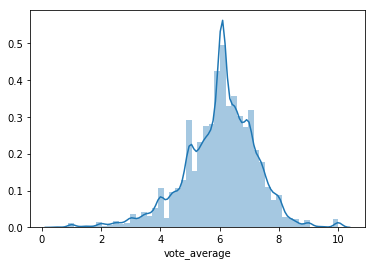

In [11]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))


In [12]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

df['month'] = df['release_date'].apply(get_month)

In [14]:
def get_day(x):
    try:
        year, month, day = ( x.split('-'))    
        answer = datetime.date(int(year), int(month), int(day)).weekday()
        return day_order[answer]
    except:
        return np.nan

df['day'] = df['release_date'].apply(get_day)

In [15]:
df['runtime'] = df['runtime'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
belongs_to_collection    45466 non-null int64
budget                   8890 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
original_language        45455 non-null object
popularity               45460 non-null float64
poster_path              45080 non-null object
production_companies     45466 non-null object
production_countries     45466 non-null object
release_date             45379 non-null object
revenue                  7408 non-null float64
runtime                  45203 non-null float64
spoken_languages         45466 non-null object
status                   45379 non-null object
title                    45460 non-null object
video                    45460 non-null object
vote_average             42462 non-null float64
vote_count               45460 non-null float64
year                     45466 non-null obj

# Préparation du Dataframe utilisé pour l'étude de revenus

In [17]:
df_rev= copy.copy(df)

In [18]:
df_rev.head().T

,0,1,2,3,4
belongs_to_collection,1,0,1,0,1
budget,3e+07,6.5e+07,NaN,1.6e+07,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
original_language,en,en,en,en,en
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
production_countries,[United States of America],[United States of America],[United States of America],[United States of America],[United States of America]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10


In [19]:
df_rev = df_rev.drop(['vote_count','vote_average','popularity','homepage', 'status','title','poster_path','video'], axis=1)

In [20]:
df_rev = df_rev[pd.notnull(df_rev['revenue'])]

In [21]:
def convert_list(x):
    if x is not None:
        if x==[]:
            return 'Nan'
        else :
            return x[0]

df_rev['genres'] = df_rev['genres'].apply(lambda x: convert_list(x))
df_rev['production_companies'] = df_rev['production_companies'].apply(lambda x: convert_list(x))
df_rev['production_countries'] = df_rev['production_countries'].apply(lambda x: convert_list(x))
df_rev['spoken_languages'] = df_rev['spoken_languages'].apply(lambda x: convert_list(x))

In [22]:
for feature in df_rev.columns: 
    if df_rev[feature].dtype == 'object':
        df_rev[feature] = pd.Categorical(df_rev[feature]).codes 


In [23]:
df_rev['budget'].fillna(df['budget'].median(), inplace=True)

In [24]:
df_rev.head().T

,0,1,3,4,5
belongs_to_collection,1.0,0.0,0.0,1.0,0.0
budget,30000000.0,65000000.0,16000000.0,8000000.0,60000000.0
genres,2.0,1.0,3.0,3.0,0.0
original_language,10.0,10.0,10.0,10.0,10.0
production_companies,1363.0,1809.0,1825.0,1536.0,1464.0
production_countries,74.0,74.0,74.0,74.0,74.0
release_date,1681.0,1693.0,1694.0,1625.0,1693.0
revenue,373554033.0,262797249.0,81452156.0,76578911.0,187436818.0
runtime,81.0,104.0,127.0,106.0,170.0
spoken_languages,10.0,10.0,10.0,10.0,10.0


In [25]:
df_rev = df_rev[pd.notnull(df_rev['runtime'])]

In [26]:
df_rev = df_rev[pd.notnull(df_rev['budget'])]

In [27]:
df_rev = (df_rev[df_rev['budget']>10000])
df_rev = (df_rev[df_rev['revenue']>10000])

In [28]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 0 to 45422
Data columns (total 13 columns):
belongs_to_collection    7148 non-null int64
budget                   7148 non-null float64
genres                   7148 non-null int8
original_language        7148 non-null int8
production_companies     7148 non-null int16
production_countries     7148 non-null int8
release_date             7148 non-null int16
revenue                  7148 non-null float64
runtime                  7148 non-null float64
spoken_languages         7148 non-null int8
year                     7148 non-null int8
month                    7148 non-null int8
day                      7148 non-null int8
dtypes: float64(3), int16(2), int64(1), int8(7)
memory usage: 356.0 KB


# Expérience 1 - Classification binaire

In [29]:
df_exp1 = copy.copy(df_rev)

In [30]:
def convert_class_binaire(x):
    if x>=1:
         return 1
    else :
         return 0

df_exp1['return'] = df_exp1['revenue']/df_exp1['budget']
df_exp1['return'] = df_exp1['return'].apply(lambda x: convert_class_binaire(x))

In [31]:
df_exp1['return'].groupby(df_exp1['return']).count()

return
0    2776
1    4372
Name: return, dtype: int64

In [32]:
df_exp1 = df_exp1.drop(['budget'], axis=1)
df_exp1 = df_exp1.drop(['revenue'], axis=1)

In [33]:
ret = df_exp1['return']
data = df_exp1.drop('return', axis=1)

In [34]:
data_array = data.as_matrix()
ret_array = ret.as_matrix()

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf=MLPClassifier(activation='relu', alpha=1e-5, hidden_layer_sizes=(18, 16),
                  random_state=42, learning_rate_init=0.001, solver='adam',
                  batch_size=10, max_iter=10)

X_exp1_train, X_exp1_test, Y_exp1_train, Y_exp1_test = cross_validation.train_test_split(
data_array, ret_array, test_size=0.3, random_state=42)

clf.fit(X_exp1_train, Y_exp1_train)
Y_exp1_pred = clf.predict(X_exp1_test)

c_matrix = confusion_matrix(Y_exp1_test, Y_exp1_pred)
print("L'accuracy est égal à {}".format(accuracy_score(Y_exp1_test, Y_exp1_pred)))




/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


L'accuracy est égal à 0.566899766899767


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 205  624]
 [ 305 1011]]


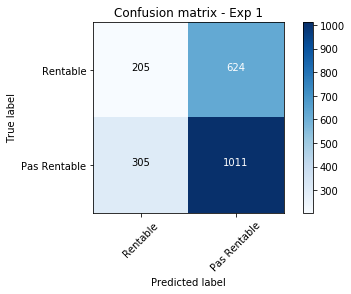

In [37]:
plt.figure()
plot_confusion_matrix(c_matrix, classes=['Rentable','Pas Rentable'],
                      title='Confusion matrix - Exp 1')

Amélioration de l'expérience 1

In [38]:
df_exp1 = df_exp1[df_exp1['return']<3]

In [39]:
parameters={
'batch_size': [10, 50],
'hidden_layer_sizes': [(10,20),(100,200)],
'activation': ["logistic", "relu"],
'max_iter':[20, 10],
'solver': ['adam', 'sgd']
}

In [40]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from __future__ import print_function


scores = ['accuracy_score']

X_exp1_train, X_exp1_test, Y_exp1_train, Y_exp1_test = cross_validation.train_test_split(
data_array, ret_array, test_size=0.3, random_state=42)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(cv=2, estimator=MLPClassifier() ,param_grid=parameters,n_jobs=-1,verbose=2)
    clf.fit(X_exp1_train, Y_exp1_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_exp1_test, clf.predict(X_exp1_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy_score

Fitting 2 folds for each of 32 candidates, totalling 64 fits


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   2.4s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   2.8s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   4.4s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   3.7s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   3.6s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.7s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.5s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   6.6s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   9.0s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   8.4s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   4.1s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_ite

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   1.0s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  11.1s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   0.6s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.6s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  12.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.9s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   1.0s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   2.9s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   3.3s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   3.6s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   4.2s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   4.6s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   4.7s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   2.0s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   1.7s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   6.0s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   5.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.9s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.3s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   1.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.8s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   6.1s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   7.0s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=relu, batc

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  17.8s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  17.8s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  26.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   0.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   0.3s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.5s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.5s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.3s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.3s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   4.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   1.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=relu, batch_

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   8.0s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   1.4s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   1.8s
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   1.9s
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   2.2s
[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   1.5s


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.2min finished


Best parameters set found on development set:

{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'adam'}

Grid scores on development set:

0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'adam'}
0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'sgd'}
0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'adam'}
0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'sgd'}
0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'adam'}
0.611 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'sgd'}
0.611 (+/-0.000) 

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


L'accuracy est égal à 0.6144522144522144
Confusion matrix, without normalization
[[  30  799]
 [  28 1288]]


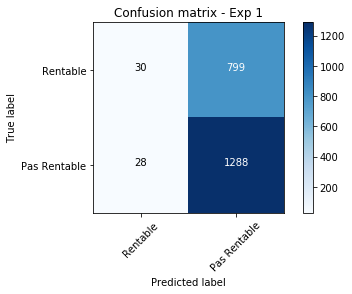

In [41]:
clf_grid =MLPClassifier(activation='relu', alpha=1e-05, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf_grid.fit(X_exp1_train, Y_exp1_train)
Y_exp1_pred = clf_grid.predict(X_exp1_test)
accuracy = accuracy_score(Y_exp1_test,Y_exp1_pred)

print("L'accuracy est égal à {}".format(accuracy))
c_matrix_grid = confusion_matrix(Y_exp1_test,Y_exp1_pred)
plt.figure()
plot_confusion_matrix(c_matrix_grid, classes=['Rentable','Pas Rentable'],
                      title='Confusion matrix - Exp 1')

# Expérience 2 - Classification des revenus en classes multiples avec MLP

In [42]:
df_exp2 = copy.copy(df_rev)

In [43]:
df_exp2.head().T

,0,1,3,4,5
belongs_to_collection,1.0,0.0,0.0,1.0,0.0
budget,30000000.0,65000000.0,16000000.0,8000000.0,60000000.0
genres,2.0,1.0,3.0,3.0,0.0
original_language,10.0,10.0,10.0,10.0,10.0
production_companies,1363.0,1809.0,1825.0,1536.0,1464.0
production_countries,74.0,74.0,74.0,74.0,74.0
release_date,1681.0,1693.0,1694.0,1625.0,1693.0
revenue,373554033.0,262797249.0,81452156.0,76578911.0,187436818.0
runtime,81.0,104.0,127.0,106.0,170.0
spoken_languages,10.0,10.0,10.0,10.0,10.0


In [44]:
df_exp2['return'] = df_exp2['revenue']/df_exp2['budget']
df_exp2['return'].describe()


count     7148.000000
mean         6.717908
std        161.062854
min          0.000514
25%          0.437678
50%          1.592235
75%          3.664051
max      12890.386667
Name: return, dtype: float64

In [45]:
from numpy import floor

def convert_class_multiple(x):
    if x<0.38:
         return 0
    elif x<1.6 :
         return 1
    elif x<3.6 :
         return 2  
    else:
         return 3

df_exp2['return'] = df_exp2['return'].apply(lambda x: convert_class_multiple(x))

In [46]:
df_exp2['return'].groupby(df_exp2['return']).count()

return
0    1647
1    1932
2    1745
3    1824
Name: return, dtype: int64

In [47]:
df_exp2 = df_exp2.drop(['budget'], axis=1)
df_exp2 = df_exp2.drop(['revenue'], axis=1)

In [48]:
return_ = df_exp2['return']
data = df_exp2.drop('return', axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler_0 = StandardScaler().fit(data)
data_0 = scaler_0.transform(data)

In [50]:
#data_ = data_0.as_matrix()
return__ = return_.as_matrix()

In [51]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
data_0, return__, test_size=0.3, random_state=42)

clf_grid.fit(X_train, Y_train) 
Y_pred = clf_grid.predict(scaler_0.transform(X_test))

print("L'accuracy est égal à {}".format(accuracy_score(Y_test, Y_pred)))



L'accuracy est égal à 0.29557109557109557


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
scores = ['accuracy_score']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(cv=2, estimator=MLPClassifier() ,param_grid=parameters,n_jobs=-1,verbose=2)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy_score

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   2.0s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   3.4s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   1.9s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   4.1s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   4.1s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   1.2s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   1.7s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.6s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   2.6s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   8.5s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  14.0s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  17.6s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  17.0s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   3.2s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.3s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   0.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.2s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   0.5s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   8.6s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.5s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.5s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   4.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   1.8s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   1.9s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10,

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   2.7s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   2.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   2.3s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   4.0s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   4.9s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.0s
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   4.9s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   3.9s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.1s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.4s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  12.8s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  12.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  15.1s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  15.2s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   8.0s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   8.1s
[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   6.5s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   6.9s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.2s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   1.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   1.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   1.4s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   0.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   0.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   4.5s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   4.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   5.4s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -   5.3s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   2.0s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -   2.0s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   1.7s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -   1.6s


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.1min finished


Best parameters set found on development set:

{'activation': 'relu', 'batch_size': 50, 'hidden_layer_sizes': (100, 200), 'max_iter': 10, 'solver': 'adam'}

Grid scores on development set:

0.389 (+/-0.009) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'adam'}
0.283 (+/-0.021) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'sgd'}
0.388 (+/-0.017) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'adam'}
0.272 (+/-0.000) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'sgd'}
0.385 (+/-0.021) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'adam'}
0.302 (+/-0.068) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'sgd'}
0.384 (+/-0.018) 

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


L'accuracy est égal à 0.37902097902097903
Confusion matrix, without normalization
[[235 168  60  19]
 [158 276  96  41]
 [108 190 156  75]
 [ 88 160 169 146]]


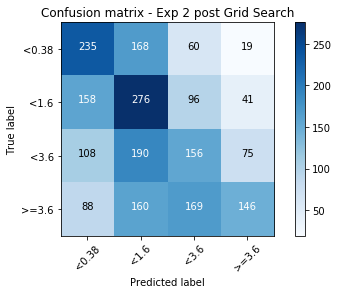

In [54]:
clf_grid =MLPClassifier(activation='relu', alpha=1e-05, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

clf_grid.fit(X_train, Y_train)
Y_exp2_pred = clf_grid.predict(X_test)
accuracy = accuracy_score(Y_test,Y_exp2_pred)

print("L'accuracy est égal à {}".format(accuracy))
c_matrix_grid = confusion_matrix(Y_test,Y_exp2_pred)
plt.figure()
plot_confusion_matrix(c_matrix_grid, classes=['<0.38','<1.6','<3.6','>=3.6'],
                      title='Confusion matrix - Exp 2 post Grid Search')

# Expérience 3 - Classification des revenus en classes multiples avec Random Forest

L'accuracy est égal à 0.3902097902097902
Confusion matrix, without normalization
[[162  91  33  32]
 [110 149  57  57]
 [ 56 127  86  94]
 [ 47  82  86 161]]


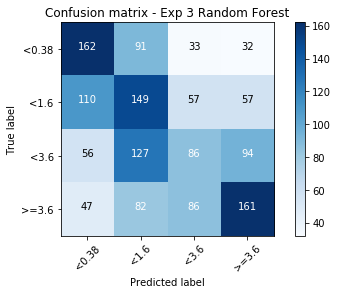

In [55]:
from sklearn.ensemble import RandomForestClassifier

y = return__
X = data_0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("L'accuracy est égal à {}".format(accuracy_score(y_test, y_pred)))

cf_rf_rev = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cf_rf_rev, classes=['<0.38','<1.6','<3.6','>=3.6'],
                      title='Confusion matrix - Exp 3 Random Forest')



# Expérience 4 - Classifications de la popularité en classes multiples avec un MLP

In [56]:
df_exp4 = copy.copy(df)

In [57]:
df_exp4.head().T

,0,1,2,3,4
belongs_to_collection,1,0,1,0,1
budget,3e+07,6.5e+07,NaN,1.6e+07,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
original_language,en,en,en,en,en
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
production_countries,[United States of America],[United States of America],[United States of America],[United States of America],[United States of America]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10


In [58]:
df_exp4 = df_exp4.drop([  'revenue','vote_count', 'homepage', 'title', 'video', 'status', 'poster_path', 'popularity'], axis=1)

In [59]:
df_exp4['vote_average'] = df_exp4['vote_average'].fillna(df_exp4['vote_average'].median())
df_exp4['runtime'] = df_exp4['runtime'].fillna(df_exp4['runtime'].median())
df_exp4['budget'] = df_exp4['budget'].fillna(df_exp4['budget'].median())

In [60]:
df_exp4['genres'] = df_exp4['genres'].apply(lambda x: convert_list(x))
df_exp4['production_companies'] = df_exp4['production_companies'].apply(lambda x: convert_list(x))
df_exp4['production_countries'] = df_exp4['production_countries'].apply(lambda x: convert_list(x))
df_exp4['spoken_languages'] = df_exp4['spoken_languages'].apply(lambda x: convert_list(x))

In [61]:
for feature in df_exp4.columns: 
    if df_exp4[feature].dtype == 'object': 
        df_exp4[feature] = pd.Categorical(df_exp4[feature]).codes

In [62]:
df_exp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 13 columns):
belongs_to_collection    45466 non-null int64
budget                   45466 non-null float64
genres                   45466 non-null int8
original_language        45466 non-null int8
production_companies     45466 non-null int16
production_countries     45466 non-null int16
release_date             45466 non-null int16
runtime                  45466 non-null float64
spoken_languages         45466 non-null int8
vote_average             45466 non-null float64
year                     45466 non-null int16
month                    45466 non-null int8
day                      45466 non-null int8
dtypes: float64(3), int16(4), int64(1), int8(5)
memory usage: 2.0 MB


In [63]:
df_exp4['vote_average'].describe()

count    45466.000000
mean         6.020501
std          1.214182
min          0.500000
25%          5.400000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [64]:
from numpy import floor
def convert_pop(x):
    if floor(x)<5:
        return 0
    elif x<5.5:
        return 1
    elif x<=6:
        return 2
    elif x<=6.4:
        return 3
    elif x<=7:
        return 4
    else:
        return 5

df_exp4['note']=df_exp4['vote_average'].apply(lambda x: convert_pop(x))       

In [65]:
df_exp4['note'].groupby(df_exp4['note']).count()

note
0    6890
1    5331
2    8466
3    8491
4    8574
5    7714
Name: note, dtype: int64

In [66]:
note = df_exp4['note']
data_pop = df_exp4.drop(['note', 'vote_average'], axis=1)

In [67]:
note_ = note.as_matrix()

In [68]:
from sklearn.preprocessing import StandardScaler

scaler_pop = StandardScaler().fit(data_pop)
data_pop_0 = scaler_pop.transform(data_pop)

In [69]:
X_pop_train, X_pop_test, Y_pop_train, Y_pop_test = train_test_split(
data_pop_0, note_, test_size=0.2, random_state=42)

X_pop_train, X_pop_val, Y_pop_train, Y_pop_val = train_test_split(X_pop_train, Y_pop_train, test_size=0.2, random_state=42)

In [70]:
scores = ['accuracy_score']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(cv=2, estimator=MLPClassifier() ,param_grid=parameters,n_jobs=-1,verbose=2)
    clf.fit(X_pop_train, Y_pop_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_pop_val, clf.predict(X_pop_val)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy_score

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   6.0s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -  11.2s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -  19.8s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -  23.9s
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -  23.9s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -  11.5s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   9.7s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -  10.1s
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd - 1.1min
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd - 1.1min
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam - 1.3min
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam - 1.3min
[CV] activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  41.9s
[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  34.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  41.1s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  32.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   1.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   6.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   6.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   1.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   2.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   1.4s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   3.8s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   3.7s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -   7.2s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  16.1s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  14.3s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  31.0s
[CV] activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  30.3s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  15.8s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  11.9s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 
[CV]  activation=logistic, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  15.6s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -  23.8s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -  29.4s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -  28.1s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -  20.7s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -  12.1s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -  10.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -  12.5s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -  11.0s
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd - 1.2min
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd - 1.3min
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam - 1.6min
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam - 1.6min
[CV] activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  45.2s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  42.8s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  34.0s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   6.2s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=10, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  33.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=adam -   5.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   4.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=20, solver=sgd -   4.8s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.3s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=sgd -   2.4s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(10, 20), max_iter=10, solver=adam -   2.8s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  22.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  20.6s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=sgd -  20.7s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=20, solver=adam -  24.1s
[CV] activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd 


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  12.4s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  14.3s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=adam -  14.2s


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, batch_size=50, hidden_layer_sizes=(100, 200), max_iter=10, solver=sgd -  11.3s


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  6.4min finished


Best parameters set found on development set:

{'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'adam'}

Grid scores on development set:

0.248 (+/-0.006) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'adam'}
0.198 (+/-0.015) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 20, 'solver': 'sgd'}
0.239 (+/-0.001) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'adam'}
0.192 (+/-0.003) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (10, 20), 'max_iter': 10, 'solver': 'sgd'}
0.264 (+/-0.003) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'adam'}
0.193 (+/-0.022) for {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100, 200), 'max_iter': 20, 'solver': 'sgd'}
0.253 (+/-0.0

/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/khairallah/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


L'accuracy est égal à 0.27391686826478995
Confusion matrix, without normalization
[[542   0 239 249 185 177]
 [279   0 224 193 185 207]
 [355   0 374 243 400 335]
 [239   0 272 390 379 399]
 [167   0 245 254 535 459]
 [110   0 157 206 445 650]]


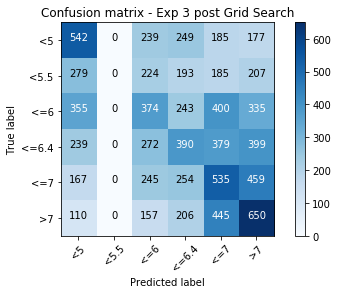

In [71]:

clf_pop_grid = MLPClassifier(activation='logistic', alpha=1e-5, hidden_layer_sizes=(100, 200), random_state=42, learning_rate_init=0.001, solver='adam', batch_size=10, max_iter=20)
clf_pop_grid.fit(X_pop_train,Y_pop_train)
Y_pop_pred = clf_pop_grid.predict(X_pop_test)
print("L'accuracy est égal à {}".format(accuracy_score(Y_pop_test, Y_pop_pred)))

c_pop = confusion_matrix(Y_pop_test, Y_pop_pred)
plt.figure()
plot_confusion_matrix(c_pop, classes=['<5','<5.5','<=6','<=6.4','<=7', '>7'],
                      title='Confusion matrix - Exp 3 post Grid Search')



# Expérience 5 : Classifications de la popularité en classes multiples avec Random Forest


L'accuracy est égal à 0.2787552232241038
Confusion matrix, without normalization
[[516  93 304 222 134 123]
 [262  69 267 199 178 113]
 [292 116 460 286 323 230]
 [213  79 337 408 368 274]
 [134  47 299 296 494 390]
 [ 96  43 181 246 414 588]]


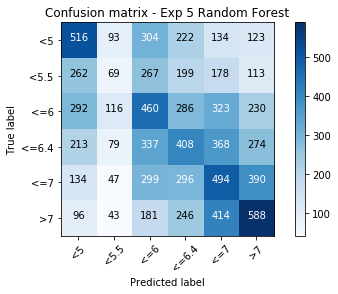

In [72]:
from sklearn.ensemble import RandomForestClassifier


y = note
X = data_pop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("L'accuracy est égal à {}".format(accuracy_score(y_test, y_pred)))

cf_rf=confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cf_rf, classes=['<5','<5.5','<=6','<=6.4','<=7', '>7'],
                      title='Confusion matrix - Exp 5 Random Forest')

